In [ ]:
#encondencoding=utf-8

import pandas as pd
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

titanic_df = pd.read_csv('titanic.csv', encoding='utf-8')

In [ ]:
titanic_df.shape

(891, 12)

In [ ]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<Axes: >

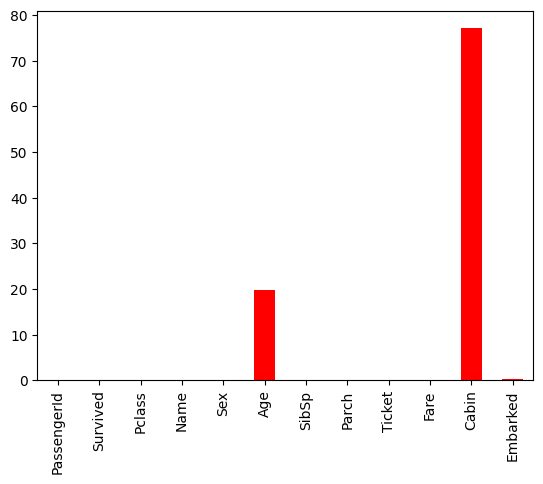

In [ ]:
# Check null data
null_df = round(titanic_df.isnull().sum()/titanic_df.shape[0],3) * 100
null_df.plot(kind="bar",color="red")

In [ ]:
# Removing unused columns
df_titanic_data = titanic_df.drop(columns=['Cabin', 'Name', 'Ticket','PassengerId'])

In [ ]:
# Standardizing age data - change missing values for average
df_titanic_data['Age'] = df_titanic_data['Age'].fillna(df_titanic_data['Age'].mean())

In [ ]:
df_titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Treating gender
df_titanic_data = df_titanic_data.drop(columns=['Sex']).join(pd.get_dummies(df_titanic_data['Sex'], prefix='sex'))

In [ ]:
df_titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,sex_female,sex_male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1


In [ ]:
# Treating board places (C = Cherbourg, Q = Queenstown, S = Southampton)
df_titanic_data = df_titanic_data.drop(columns=['Embarked']).join(pd.get_dummies(df_titanic_data['Embarked'], prefix='embarked'))

In [ ]:
df_titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


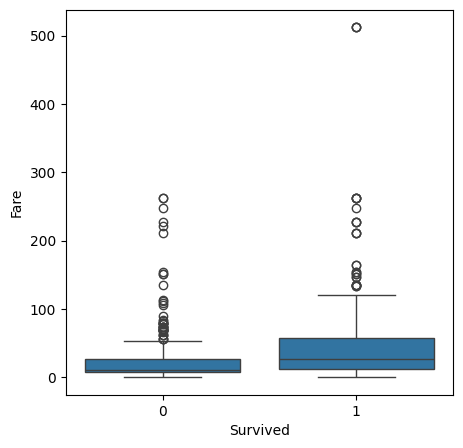

In [ ]:
#Verifying Outliers
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(x='Survived', y='Fare', data=df_titanic_data)
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

In [ ]:
#Verifying Outliers
fare_outliers = df_titanic_data[df_titanic_data['Fare'] > 500]
df_titanic_data = df_titanic_data[df_titanic_data['Fare'] < 500]

<Axes: >

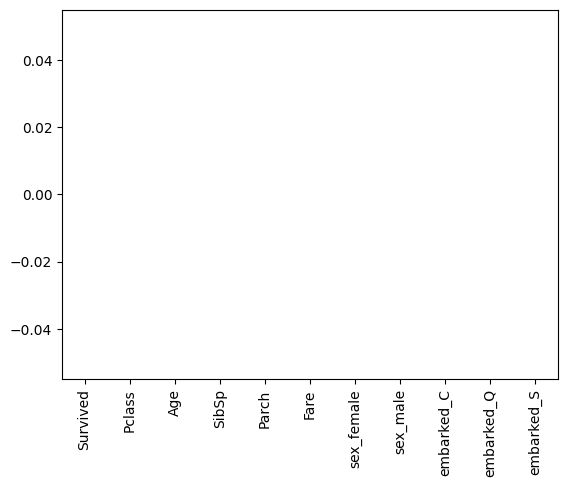

In [ ]:
# Check null values
validate_nulls = round(df_titanic_data.isnull().sum()/df_titanic_data.shape[0],3) * 100
validate_nulls.plot(kind="bar")

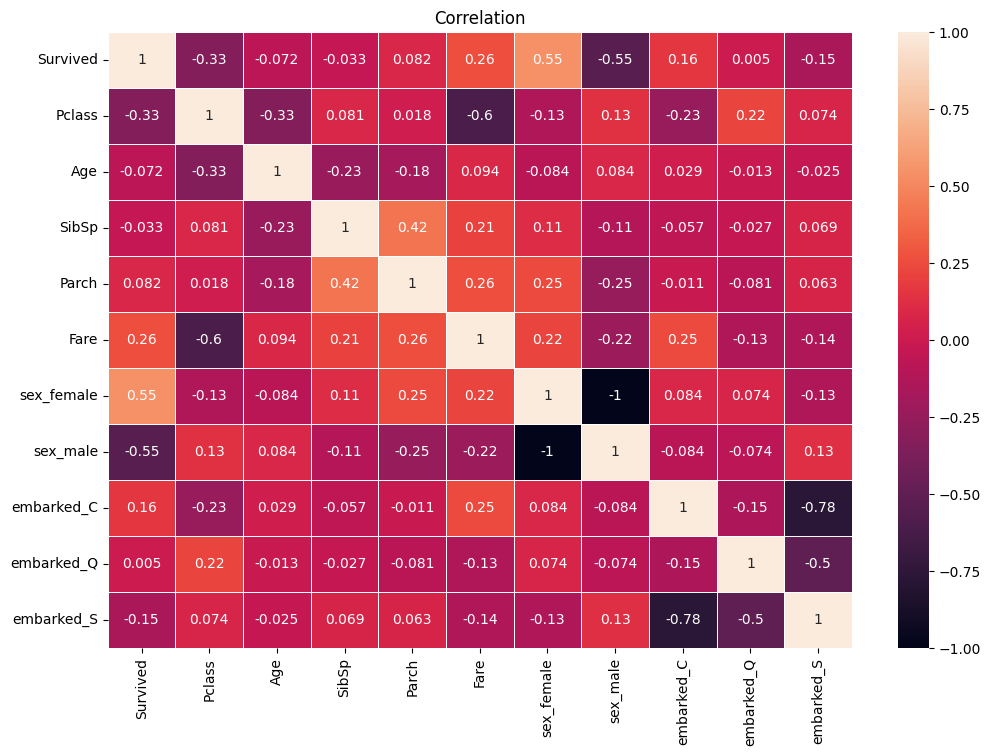

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_titanic_data.corr(), linewidth=.5, annot=True)
plt.title('Correlation')
plt.show()

**Creating model**

In [ ]:
X = df_titanic_data.drop('Survived', axis=1)
y = df_titanic_data['Survived']

In [ ]:
#Separating training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
model.score(X_test, y_test)

0.8258426966292135

In [ ]:
#Accuracy of outliers removed
for col in df_titanic_data.columns:
    if fare_outliers[col].dtype == "object":
        fare_outliers[col] = fare_outliers[col].astype("category").cat.codes

model.score(fare_outliers[[col for col in df_titanic_data.columns if col != 'Survived']], fare_outliers['Survived'])

0.3333333333333333